In [77]:
import altair as alt
import pandas as pd

In [78]:
data = pd.read_csv('fuel_formatted_v03.csv', index_col=0)

In [79]:
data.head(10)

,odometer,grade,price,litre,cost,date,tank,fueleff
0,10795,94,1.389,5.129,7.12,2016-06-14 00:00:00+00:00,33.53,NaN
1,10967,94,1.449,5.185,7.51,2016-06-20 00:00:00+00:00,31.24,16.68
2,11129,94,1.444,4.273,6.17,2016-06-24 00:00:00+00:00,37.21,22.90
3,11288,94,1.459,4.786,6.98,2016-06-30 00:00:00+00:00,33.43,25.45
4,11448,94,1.429,4.742,6.78,2016-07-07 00:00:00+00:00,32.26,27.08
5,11601,91,1.429,4.400,6.29,2016-07-14 00:00:00+00:00,36.59,28.27
6,11762,94,1.449,5.068,7.34,2016-07-18 00:00:00+00:00,34.53,28.79
7,11937,94,1.409,4.424,6.23,2016-07-25 00:00:00+00:00,40.01,30.05
8,12114,94,1.349,5.338,7.20,2016-08-02 00:00:00+00:00,30.54,30.43
9,12277,84,1.189,4.821,5.73,2016-08-08 00:00:00+00:00,34.23,30.77


In [80]:
data.dtypes

odometer      int64
grade         int64
price       float64
litre       float64
cost        float64
date         object
tank        float64
fueleff     float64
dtype: object

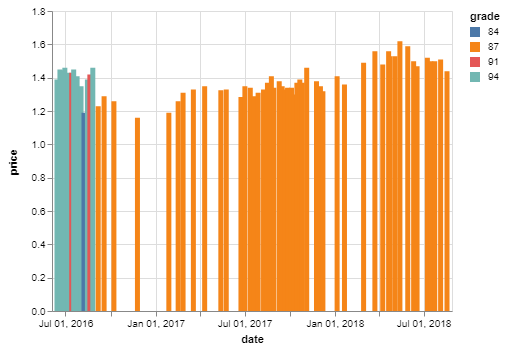

In [81]:
hover = alt.selection_single(on='mouseover', nearest=False, empty='none')

base = alt.Chart().mark_bar().encode(
    x='date:T',
    y='price:Q',
    color=alt.condition(hover, alt.value('gray'),'grade:N')
)

chart = base.mark_bar().add_selection(
    hover
).interactive()

chart += base.mark_text(dy=-5).encode(
    text = 'grade:N',
    opacity = alt.condition(hover, alt.value(1), alt.value(0))
)
chart.data=data
chart

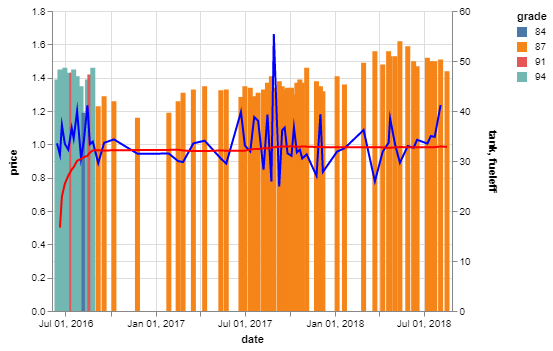

In [82]:
highlight = alt.selection(type='single', on='mouseover', fields=['odometer'],nearest=True)

base = alt.Chart(data).encode(
    alt.X('date:T',
        #axis=alt.Axis(format='%b'),
        #scale=alt.Scale(zero=False)
    )
)

bar = base.mark_bar().encode(
    y='price:Q',
    color='grade:N'
)

line =  base.mark_line(color='black').encode(
    y='tank:Q',
    size=alt.value(2)
)

sublayer = alt.layer(
    base.mark_line(color='blue').encode(y='tank:Q'),
    base.mark_line(color='red').encode(y='fueleff:Q')
)


alt.layer(
    bar,
    sublayer
).resolve_scale(
    y='independent'
).interactive()